In [ ]:
#Import the required library
import pandas as pd

#Load the Data and assign a variable name to it
mcdata = pd.read_csv('/content/Marketing Campaign data.csv')

#View the first 5 rows to view and have an understanding of the Data
mcdata.head()

,CUST_ID,CUST_GENDER,AGE,CUST_MARITAL_STATUS,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI,COMMENTS
0,101501,F,41,NeverM,United States of America,"J: 190,000 - 249,999",Masters,Prof.,2,4,0,1,1,1,1,1,0,0,Shopping at your store is a hassle. I rarely s...
1,101502,M,27,NeverM,United States of America,"I: 170,000 - 189,999",Bach.,Sales,2,3,0,1,1,0,1,1,1,0,Affinity card is great. I think it is a hassle...
2,101503,F,20,NeverM,United States of America,"H: 150,000 - 169,999",HS-grad,Cleric.,2,2,0,1,0,0,1,1,1,0,"I purchased a new computer recently, but the m..."
3,101504,M,45,Married,United States of America,"B: 30,000 - 49,999",Bach.,Exec.,3,5,1,0,0,1,1,1,0,0,Affinity card is great. I think it is a hassle...
4,101505,M,34,NeverM,United States of America,"K: 250,000 - 299,999",Masters,Sales,9+,5,1,1,1,0,1,1,0,0,Why didn't you start a program like this befor...


In [ ]:
#Question 1.1

#Perform the describe() and info() methods to show characteristics of each attributes
summary = mcdata.describe()
info = mcdata.info()

#Concatenate the two outputs and assign a new Dataframe to it
describe= pd.concat([summary,info])

#Display the result
print(describe)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   CUST_ID                  1500 non-null   int64 
 1   CUST_GENDER              1500 non-null   object
 2   AGE                      1500 non-null   int64 
 3   CUST_MARITAL_STATUS      1500 non-null   object
 4   COUNTRY_NAME             1500 non-null   object
 5   CUST_INCOME_LEVEL        1500 non-null   object
 6   EDUCATION                1500 non-null   object
 7   OCCUPATION               1500 non-null   object
 8   HOUSEHOLD_SIZE           1500 non-null   object
 9   YRS_RESIDENCE            1500 non-null   int64 
 10  AFFINITY_CARD            1500 non-null   int64 
 11  BULK_PACK_DISKETTES      1500 non-null   int64 
 12  FLAT_PANEL_MONITOR       1500 non-null   int64 
 13  HOME_THEATER_PACKAGE     1500 non-null   int64 
 14  BOOKKEEPING_APPLICATION  1500 non-null  

In [ ]:
#Question 1.2

#Create a DataFrame to calculate missing entries and unique data types
missing_data = pd.DataFrame({
    'Missing Entries': mcdata.isnull().sum(),
    'Unique Data Types': mcdata.apply(lambda x: set(x.apply(type))),
})
print(missing_data)

#Input some space for clarity
print()

#Define the expected column types
expected_types = {
    'CUST_ID': int,
    'CUST_GENDER': str,
    'AGE': int,
    'CUST_MARITAL_STATUS': str,
    'COUNTRY_NAME': str,
    'CUST_INCOME_LEVEL': str,
    'EDUCATION': str,
    'OCCUPATION': str,
    'HOUSEHOLD_SIZE': int,
    'YRS_RESIDENCE': int,
    'AFFINITY_CARD': int,
    'BULK_PACK_DISKETTES': int,
    'FLAT_PANEL_MONITOR': int,
    'HOME_THEATER_PACKAGE': int,
    'BOOKKEEPING_APPLICATION': int,
    'PRINTER_SUPPLIES': int,
    'Y_BOX_GAMES': int,
    'OS_DOC_SET_KANJI': int,
    'COMMENTS': str
}

#Loop through each column and count the number of errors
num_errors = {}
for column, expected_type in expected_types.items():
    incorrect_mask = mcdata[column].apply(lambda x: not isinstance(x, expected_type))
    num_errors[column] = incorrect_mask.sum()

#Create a data frame with the error counts
error_df = pd.DataFrame({'Column': list(num_errors.keys()), 'Error Count': list(num_errors.values())})

#Display the data frame
print(error_df)

                         Missing Entries                 Unique Data Types
CUST_ID                                0                   {<class 'int'>}
CUST_GENDER                            0                   {<class 'str'>}
AGE                                    0                   {<class 'int'>}
CUST_MARITAL_STATUS                    0                   {<class 'str'>}
COUNTRY_NAME                           0                   {<class 'str'>}
CUST_INCOME_LEVEL                      0                   {<class 'str'>}
EDUCATION                              0                   {<class 'str'>}
OCCUPATION                             0                   {<class 'str'>}
HOUSEHOLD_SIZE                         0                   {<class 'str'>}
YRS_RESIDENCE                          0                   {<class 'int'>}
AFFINITY_CARD                          0                   {<class 'int'>}
BULK_PACK_DISKETTES                    0                   {<class 'int'>}
FLAT_PANEL_MONITOR       

Household_size column being read as string/object, has to be converted to integers for analysis.

In [ ]:
#Question 2.1

#Create a new DataFrame where all irrelevant columns are omitted

mcdatax = mcdata.drop(columns=['CUST_ID','BULK_PACK_DISKETTES','FLAT_PANEL_MONITOR',
                         'HOME_THEATER_PACKAGE','BOOKKEEPING_APPLICATION',
                         'PRINTER_SUPPLIES','Y_BOX_GAMES','OS_DOC_SET_KANJI','COMMENTS'])

#Display new dataframe
print(mcdatax)

     CUST_GENDER  AGE CUST_MARITAL_STATUS              COUNTRY_NAME  \
0              F   41              NeverM  United States of America   
1              M   27              NeverM  United States of America   
2              F   20              NeverM  United States of America   
3              M   45             Married  United States of America   
4              M   34              NeverM  United States of America   
...          ...  ...                 ...                       ...   
1495           M   17              NeverM  United States of America   
1496           M   41             Married                     Spain   
1497           M   53             Married  United States of America   
1498           M   55             Married  United States of America   
1499           F   40             Divorc.  United States of America   

         CUST_INCOME_LEVEL EDUCATION OCCUPATION HOUSEHOLD_SIZE  YRS_RESIDENCE  \
0     J: 190,000 - 249,999   Masters      Prof.              2    

Customer information like Customer ID, Home theater package, Bookkeeping application etc. have no impact and are not relevant from a Marketing point of view, and should therefore be omitted in the analysis.

*The task of reducing variables in a data set is a common preprocessing step in data analysis and machine learning. It can help improve the accuracy and efficiency of predictive models by removing irrelevant or redundant features.

In [ ]:
# #Question 2.2

#Convert non-numeric values to intergers and/or float in HOUSEHOLD_SIZE column
mcdatax['HOUSEHOLD_SIZE'].replace(['06-Aug', '04-May'], [7.0, 4.5], inplace=True)

#Replace string/object variables in HOUSEHOLD_SIZE  with integers
mcdatax['HOUSEHOLD_SIZE'].replace(['1','2','3','9+'],[1.0,2.0,3.0,9.0], inplace=True)

#Remove the rows with '?' in the OCCUPATION Column
mcdatax.drop(mcdatax[mcdatax['OCCUPATION'] == '?'].index, inplace=True)

#Display result
print(mcdatax.tail())

     CUST_GENDER  AGE CUST_MARITAL_STATUS              COUNTRY_NAME  \
1495           M   17              NeverM  United States of America   
1496           M   41             Married                     Spain   
1497           M   53             Married  United States of America   
1498           M   55             Married  United States of America   
1499           F   40             Divorc.  United States of America   

         CUST_INCOME_LEVEL EDUCATION OCCUPATION  HOUSEHOLD_SIZE  \
1495    C: 50,000 - 69,999      10th      Other             1.0   
1496  L: 300,000 and above     Bach.      Exec.             3.0   
1497  J: 190,000 - 249,999   HS-grad      Exec.             3.0   
1498    C: 50,000 - 69,999   HS-grad    Cleric.             3.0   
1499   E: 90,000 - 109,999   HS-grad    Cleric.             2.0   

      YRS_RESIDENCE  AFFINITY_CARD  
1495              1              0  
1496              4              0  
1497              8              1  
1498              7   

The Household_Size column contains values like 9+, 06-Aug , 04-May which are not integers.

For the sake of this analysis, the 9+ would be converted to 9, while the entries which are being read as dates are actually '06-08' for '06-Aug', and '04-05' for '04-May'. To improve the quality of this analysis, we would use the average of these ranges. (i.e 06-08 = 7, 04-05 = 4.5)

In order to improve the accuracy of the data analysis, increase the reliability, enhance the efficiency, and ensure that meaningful insights are drawn from the analysis, it is important to clean the data and eliminate errors and/or missing values.

In [ ]:
#Question 2.3

#Define a function to transform the CUST_GENDER column where F=0 & M=1
def transform_cust_gender(value):
    if value == 'F':
        return 0
    elif value == 'M':
        return 1

# apply the function to the CUST_GENDER column
mcdatax['CUST_GENDER'] = mcdatax['CUST_GENDER'].apply(transform_cust_gender)

#Display the result
print(mcdatax.tail(5))

      CUST_GENDER  AGE CUST_MARITAL_STATUS              COUNTRY_NAME  \
1495            1   17              NeverM  United States of America   
1496            1   41             Married                     Spain   
1497            1   53             Married  United States of America   
1498            1   55             Married  United States of America   
1499            0   40             Divorc.  United States of America   

         CUST_INCOME_LEVEL EDUCATION OCCUPATION  HOUSEHOLD_SIZE  \
1495    C: 50,000 - 69,999      10th      Other             1.0   
1496  L: 300,000 and above     Bach.      Exec.             3.0   
1497  J: 190,000 - 249,999   HS-grad      Exec.             3.0   
1498    C: 50,000 - 69,999   HS-grad    Cleric.             3.0   
1499   E: 90,000 - 109,999   HS-grad    Cleric.             2.0   

      YRS_RESIDENCE  AFFINITY_CARD  
1495              1              0  
1496              4              0  
1497              8              1  
1498            

In [ ]:
#Question 2.4

# count the occurrences of each country in the COUNTRY_NAME column
count_of_country = mcdatax['COUNTRY_NAME'].value_counts()

# assign ordinal numbers based on the descending order of occurrence
ordinal_numbers = count_of_country.rank(ascending=False, method= 'dense')

# create a dictionary to map countries to their ordinal numbers
country_ordinal_map = dict(zip(ordinal_numbers.index, ordinal_numbers))


# apply the mapping to the COUNTRY_NAME column
mcdatax['COUNTRY_NAME'] = mcdatax['COUNTRY_NAME'].map(country_ordinal_map)

#Display the result
print(mcdatax.tail(5))

      CUST_GENDER  AGE CUST_MARITAL_STATUS  COUNTRY_NAME  \
1495            1   17              NeverM           1.0   
1496            1   41             Married          12.0   
1497            1   53             Married           1.0   
1498            1   55             Married           1.0   
1499            0   40             Divorc.           1.0   

         CUST_INCOME_LEVEL EDUCATION OCCUPATION  HOUSEHOLD_SIZE  \
1495    C: 50,000 - 69,999      10th      Other             1.0   
1496  L: 300,000 and above     Bach.      Exec.             3.0   
1497  J: 190,000 - 249,999   HS-grad      Exec.             3.0   
1498    C: 50,000 - 69,999   HS-grad    Cleric.             3.0   
1499   E: 90,000 - 109,999   HS-grad    Cleric.             2.0   

      YRS_RESIDENCE  AFFINITY_CARD  
1495              1              0  
1496              4              0  
1497              8              1  
1498              7              1  
1499              3              0  


had to use 'dense' method, as I was getting decimals as the default is the 'average' method

In [ ]:
#Question 2.5

#Create a dictionary mapping income levels to ordinal numbers
cust_income_levels = {'A: Below 30,000':1, 'B: 30,000 - 49,999':2,
                 'C: 50,000 - 69,999':3, 'D: 70,000 - 89,999':4,
                 'E: 90,000 - 109,999':5, 'F: 110,000 - 129,999':6,
                 'G: 130,000 - 149,999':7, 'H: 150,000 - 169,999':8,
                 'I: 170,000 - 189,999':9, 'J: 190,000 - 249,999':10,
                 'K: 250,000 - 299,999':11, 'L: 300,000 and above':12}

mcdatax['CUST_INCOME_LEVEL'] = mcdatax['CUST_INCOME_LEVEL'].map(cust_income_levels)

#Display the result
print(mcdatax)

      CUST_GENDER  AGE CUST_MARITAL_STATUS  COUNTRY_NAME  CUST_INCOME_LEVEL  \
0               0   41              NeverM           1.0                 10   
1               1   27              NeverM           1.0                  9   
2               0   20              NeverM           1.0                  8   
3               1   45             Married           1.0                  2   
4               1   34              NeverM           1.0                 11   
...           ...  ...                 ...           ...                ...   
1495            1   17              NeverM           1.0                  3   
1496            1   41             Married          12.0                 12   
1497            1   53             Married           1.0                 10   
1498            1   55             Married           1.0                  3   
1499            0   40             Divorc.           1.0                  5   

     EDUCATION OCCUPATION  HOUSEHOLD_SIZE  YRS_RESI

In [ ]:
#Question 2.6

# Define a dictionary to map education levels to ordinal numbers
cust_education_levels = {'PhD': 1, 'Masters': 2, 'Profsc': 3, 'Bach.': 4,
                    '< Bach.': 5, 'Assoc-A': 6, 'Assoc-V': 7, 'HS-grad': 8,
                    '12th': 9, '11th': 10, '10th': 11, '9th': 12, '7th-8th': 13,
                    '5th-6th': 14, '1st-4th': 15, 'Presch.': 16}

# Map education levels to ordinal numbers and create a new column
mcdatax['EDUCATION'] = mcdatax['EDUCATION'].map(cust_education_levels)

#Display the result
print(mcdatax.head())

   CUST_GENDER  AGE CUST_MARITAL_STATUS  COUNTRY_NAME  CUST_INCOME_LEVEL  \
0            0   41              NeverM           1.0                 10   
1            1   27              NeverM           1.0                  9   
2            0   20              NeverM           1.0                  8   
3            1   45             Married           1.0                  2   
4            1   34              NeverM           1.0                 11   

   EDUCATION OCCUPATION  HOUSEHOLD_SIZE  YRS_RESIDENCE  AFFINITY_CARD  
0          2      Prof.             2.0              4              0  
1          4      Sales             2.0              3              0  
2          8    Cleric.             2.0              2              0  
3          4      Exec.             3.0              5              1  
4          2      Sales             9.0              5              1  


*Explain based on your research of the USA Edu system

In [ ]:
#Question 2.7

# Define a dictionary to map Household size to ordinal numbers
household_size_num = {1.0: 1, 2.0: 2, 3.0: 3, 4.5: 4, 7.0: 5,9.0: 6}

# Apply mapping to HOUSEHOLD_SIZE column
mcdatax['HOUSEHOLD_SIZE'] = mcdatax['HOUSEHOLD_SIZE'].map(household_size_num)

#Print updated mcdatax dataframe
print(mcdatax.tail(20))

      CUST_GENDER  AGE CUST_MARITAL_STATUS  COUNTRY_NAME  CUST_INCOME_LEVEL  \
1479            0   19              NeverM           1.0                 12   
1480            0   43             Married           1.0                 10   
1481            0   33              NeverM           1.0                 10   
1482            1   32             Married           1.0                  7   
1483            0   30              Separ.           1.0                  4   
1484            1   27              NeverM           1.0                 12   
1485            1   19              NeverM           1.0                  1   
1486            1   51             Married           1.0                 12   
1487            0   31              Separ.           1.0                 10   
1488            1   35              NeverM           1.0                  5   
1489            1   35              NeverM           1.0                 11   
1490            1   52             Married          

In [ ]:
#Define a dictionary to map Marital status and Occupations to ordinal numbers (in alphabetical order)

cust_marital_status_mapping = {'Divorc.':1, 'Mabsent':2, 'Mar-AF':3,
                               'Married':4, 'NeverM':5, 'Separ.':6, 'Widowed':7}

occupation_mapping = {'Armed-F':1, 'Cleric.':2, 'Crafts':3, 'Exec.':4,
                      'Farming':5, 'Handler':6, 'House-s':7, 'Machine':8,
                      'NotSpec.':9, 'Other':10, 'Prof.':11, 'Protec.':12,
                      'Sales':13, 'TechSup':14, 'Transp.':15}

#Apply the mapping to the CUST_MARITAL_STATUS column
mcdatax['CUST_MARITAL_STATUS'] = mcdatax['CUST_MARITAL_STATUS'].map(
    cust_marital_status_mapping)

#Apply the mapping to the OCCUPATION column
mcdatax['OCCUPATION'] = mcdatax['OCCUPATION'].map(occupation_mapping)

#Display the result
print(mcdatax.head(5))

   CUST_GENDER  AGE  CUST_MARITAL_STATUS  COUNTRY_NAME  CUST_INCOME_LEVEL  \
0            0   41                    5           1.0                 10   
1            1   27                    5           1.0                  9   
2            0   20                    5           1.0                  8   
3            1   45                    4           1.0                  2   
4            1   34                    5           1.0                 11   

   EDUCATION  OCCUPATION  HOUSEHOLD_SIZE  YRS_RESIDENCE  AFFINITY_CARD  
0          2          11               2              4              0  
1          4          13               2              3              0  
2          8           2               2              2              0  
3          4           4               3              5              1  
4          2          13               6              5              1  


In [ ]:
#Question 3.1

#Evaluate the summary statistics of the variables and create a new single DataFrame for the results
statistics = pd.DataFrame({
    'Sum': mcdatax.sum(),
    'Mean': mcdatax.mean(),
    'Standard deviation': mcdatax.std(),
    'Skewness': mcdatax.skew(),
    'Kurtosis': mcdatax.kurt(),
})

# Print the result
print(statistics)

                         Sum       Mean  Standard deviation  Skewness  \
CUST_GENDER            971.0   0.683803            0.465155 -0.791401   
AGE                  54951.0  38.697887           13.126784  0.568577   
CUST_MARITAL_STATUS   5765.0   4.059859            1.362932 -1.013142   
COUNTRY_NAME          1931.0   1.359859            1.417974  4.988359   
CUST_INCOME_LEVEL    11530.0   8.119718            3.084395 -0.646925   
EDUCATION             9109.0   6.414789            2.688515  0.529066   
OCCUPATION           10769.0   7.583803            4.320088  0.133008   
HOUSEHOLD_SIZE        4142.0   2.916901            1.393176  0.889278   
YRS_RESIDENCE         5876.0   4.138028            1.895238  0.780784   
AFFINITY_CARD          370.0   0.260563            0.439097  1.092125   

                      Kurtosis  
CUST_GENDER          -1.375623  
AGE                   0.079405  
CUST_MARITAL_STATUS   1.002571  
COUNTRY_NAME         26.758324  
CUST_INCOME_LEVEL    -0.649052 

In [ ]:
#Question 3.2

#calculate the correlation of each column with 'AFFINITY_CARD' column
corr_of_variables = mcdatax.corr()['AFFINITY_CARD']

#Display the correlation values
print(corr_of_variables)

CUST_GENDER            0.224247
AGE                    0.247680
CUST_MARITAL_STATUS   -0.039034
COUNTRY_NAME           0.030393
CUST_INCOME_LEVEL     -0.020968
EDUCATION             -0.324431
OCCUPATION             0.002226
HOUSEHOLD_SIZE         0.051548
YRS_RESIDENCE          0.351373
AFFINITY_CARD          1.000000
Name: AFFINITY_CARD, dtype: float64


Enter variable name /*or type exit to close->>EDUCATION


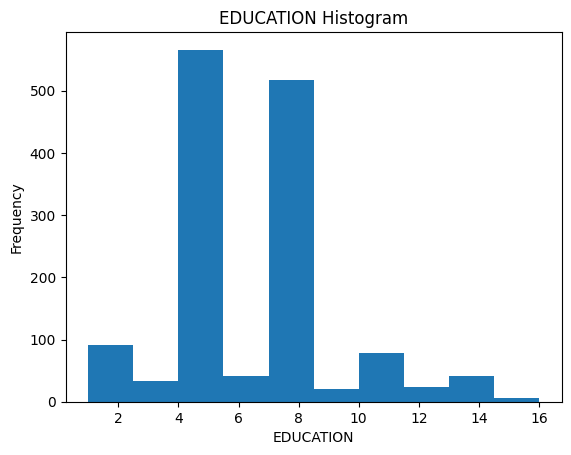

Enter variable name /*or type exit to close->>exit


In [ ]:
#Question 4.1

#Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt

#Use conditional statements to create an infinite loop, check if the variable names are valid before plotting a histogram
while True:
    variable_name = input('Enter variable name /*or type exit to close->>')
    if variable_name == 'exit':
        break
    elif variable_name not in mcdatax.columns:
        print('Variable name Not Found. Try again.')
        continue
    else:
        plt.hist(mcdatax[variable_name])
        plt.title(f"{variable_name} Histogram")
        plt.xlabel(variable_name)
        plt.ylabel("Frequency")
        plt.show()

Enter 1st variable name /*or type exit to close->>EDUCATION
Enter 2nd variable name /*or type exit to close->>OCCUPATION


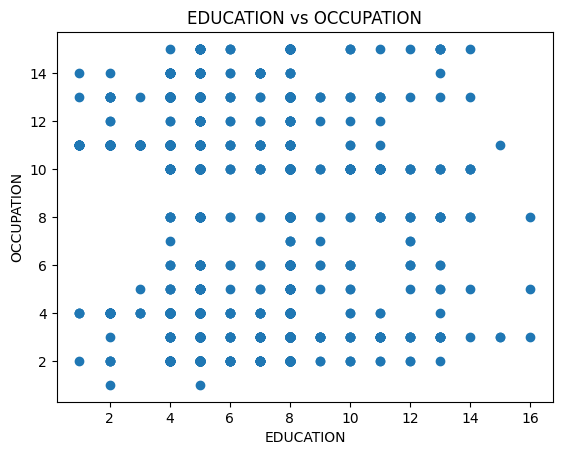

Enter 1st variable name /*or type exit to close->>exit


In [ ]:
#Question 4.2

#Use conditional statements to create an infinite loop, check if the variable name is valid before plotting a histogram
while True:
    variable1 = input('Enter 1st variable name /*or type exit to close->>')
    if variable1 == 'exit':
        break
    elif variable1 not in mcdatax.columns:
        print('Variable name Not Found. Try again.')
        continue
    else:
        variable2 = input('Enter 2nd variable name /*or type exit to close->>')
        if variable2 == 'exit':
          break
        elif variable2 not in mcdatax.columns:
            print('Variable name Not Found. Try again.')
            continue
        else:
            plt.scatter(mcdatax[variable1], mcdatax[variable2])
            plt.title(variable1 + ' vs ' + variable2)
            plt.xlabel(variable1)
            plt.ylabel(variable2)
            plt.show()

Logistic Regression Accuracy: 0.7922535211267606


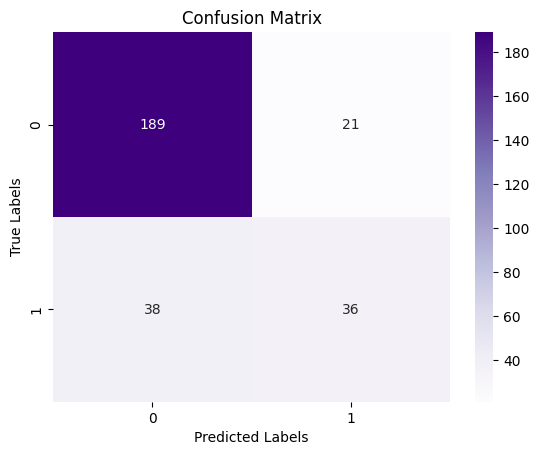

In [ ]:
#Question 5

#Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

#Split the data into training and testing sets for the models
X = mcdatax.drop('AFFINITY_CARD', axis=1)
y = mcdatax['AFFINITY_CARD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Question 5.1 - Logistic Regression:

#Train the Logistic Regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

#Make predictions of the target variable using the Logistic Regression model
y_pred = lr.predict(X_test)

#Evaluate the accuracy of the Logistic Regression model
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", acc)


#Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cnf_matrix, cmap="Purples", annot=True, fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


max_iter=1000 * 'The error message indicates that the solver used by the logistic regression model failed to converge, which means that it reached the maximum number of iterations without finding the optimal solution. To address this issue, I had to increase the maximum number of iterations by setting the max_iter parameter to a higher value (1000)


Naive Bayes Accuracy: 0.7676056338028169


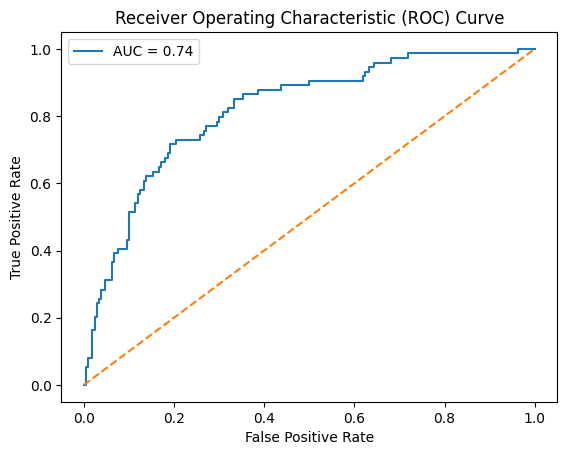

In [ ]:
#QUESTION 5.2 - Naive Bayes:

#Import the required library
from sklearn.naive_bayes import GaussianNB

#Train the Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

#Make predictions of the target variable using the Naive Bayes model
y_pred = nb.predict(X_test)

#Evaluate the Naive Bayes model
acc = accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy:", acc)

# Create and plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
auc_score = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
